This script performs plotting of affinity matrices and scatter plots. Also it plots scores distribution. It is also used to write some shell scripts

In [1]:

import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp

In [ ]:
pwd

The below script DIHARD affinity plots after training model using PLDA adjacency matrix. For targets it uses groundtruth adjacency which contains only 1's for clean and overlapping segments sharing the same speaker and 0's if the segments don't share common speaker. We use 0.75 sec shift for training and 0.25sec shift for evaluation

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp
dataset_str='dihard_dev_2020_track1_fbank_jhu'
# scorespath = 'exp_march/results_spec_sup_expdist_sigma0.1_max2overlaps_1_xvec0.75shift_PLDA_scaled/scorestrain_expdist_epoch10/'
scorespathlearnt = '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_expdist_sigma1.0_max2overlaps_1_xvec0.75shift_PLDA_scaled/val_loss_40/scores_expdist'
scorespath = '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_expdist_sigma1.0_max2overlaps_1_xvec0.75shift_PLDA_scaled/val_loss_0/scores_expdist'
scorespathcosmodel =f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_max2overlaps_1_xvec0.75shift_norm_PLDA_scaled/v2/{dataset_str}/spectral_threshold/scores_cos/'

gnd_scores=f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp/{dataset_str}/ground_adj_val/'
pldapath=f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp/{dataset_str}/plda_adj_A_scale10/'
# filelist= !ls {scorespath}/*.npy
filepath = 'lists/{}/file_val'.format(dataset_str)
filelist = np.genfromtxt(filepath,dtype=str)
# filelist = np.sort(np.genfromtxt(filepath,dtype=str))
%matplotlib inline
for filename in filelist[:5]:
    
    # f = filename.split('/')[-1].split('.')[0]
    f = filename
    # print(f)
    scores  = np.load(f'{scorespath}/{filename}.npy')
    scoreslearnt = np.load(f'{scorespathlearnt}/{f}.npy')
    # scoreslearnt = (scoreslearnt - np.min(scoreslearnt))/(np.max(scoreslearnt) -  np.min(scoreslearnt))
    
    scorescosmodel =np.load(f'{scorespathcosmodel}/{f}.npy')
    # scorescosmodel = 1/(1+np.exp(-scorescosmodel*10))
    if np.min(scorescosmodel) < 0:
        scorescosmodel = (scorescosmodel - np.min(scorescosmodel))/(np.max(scorescosmodel) -  np.min(scorescosmodel))
    groundscores = pkl.load(open(f'{gnd_scores}/{f}.pkl','rb'))['adj_overlap'].toarray()
    pldascores = pkl.load(open(f'{pldapath}/{f}.pkl','rb'))
    %matplotlib inline
    plt.figure()
    plt.subplot(1,4,1)
    plt.imshow(groundscores)
    plt.title(f.split('DEV_')[-1])
    plt.colorbar()
    
    plt.subplot(1,4,2)
    plt.imshow(pldascores)
    plt.colorbar()
    plt.subplot(1,4,3)
    plt.imshow(scores)
    plt.colorbar()
    plt.subplot(1,4,4)
    plt.imshow(scoreslearnt)
    plt.colorbar()
    plt.figure()
    plt.subplot(1,4,4)
    plt.imshow(scorescosmodel)
    plt.colorbar()
    plt.title(f.split('DEV_')[-1])
    plt.show()
    # if f=='DH_DEV_0039':
    #     break


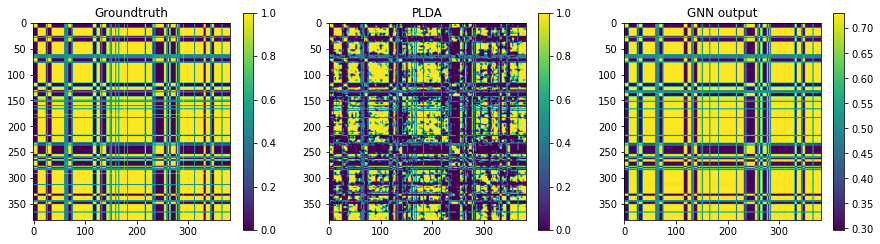

In [15]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp
dataset_str='dihard_dev_2020_track1_fbank_jhu'
# scorespath = 'exp_march/results_spec_sup_expdist_sigma0.1_max2overlaps_1_xvec0.75shift_PLDA_scaled/scorestrain_expdist_epoch10/'
scorespathlearnt = '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_expdist_sigma1.0_max2overlaps_1_xvec0.75shift_PLDA_scaled/val_loss_40/scores_expdist'
scorespath = '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_expdist_sigma1.0_max2overlaps_1_xvec0.75shift_PLDA_scaled/val_loss_0/scores_expdist'
scorespathcosmodel =f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_max2overlaps_1_xvec0.75shift_norm_PLDA_scaled/v2/{dataset_str}/spectral_threshold/scores_cos/'

gnd_scores=f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp/{dataset_str}/ground_adj_val/'
pldapath=f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp/{dataset_str}/plda_adj_A_scale10/'
# filelist= !ls {scorespath}/*.npy
filepath = 'lists/{}/file_val'.format(dataset_str)
filelist = np.genfromtxt(filepath,dtype=str)
# filelist = np.sort(np.genfromtxt(filepath,dtype=str))
%matplotlib inline
for filename in filelist[:10]:
    
    # f = filename.split('/')[-1].split('.')[0]
    f = filename
    # print(f)
    scores  = np.load(f'{scorespath}/{filename}.npy')
    N = scores.shape[0]
    scoreslearnt = np.load(f'{scorespathlearnt}/{f}.npy')
    # scoreslearnt = scoreslearnt - np.min(scoreslearnt)
    # scoreslearnt = scoreslearnt/np.max(scoreslearnt)
    scorescosmodel =np.load(f'{scorespathcosmodel}/{f}.npy')
    # scorescosmodel = 1/(1+np.exp(-scorescosmodel))
    if np.min(scorescosmodel) < 0:
        scorescosmodel = (scorescosmodel - np.min(scorescosmodel))/(np.max(scorescosmodel) -  np.min(scorescosmodel))

    groundscores = pkl.load(open(f'{gnd_scores}/{f}.pkl','rb'))['adj_overlap'].toarray() + np.eye(N)
    pldascores = pkl.load(open(f'{pldapath}/{f}.pkl','rb'))
    %matplotlib inline
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    plt.imshow(groundscores)
    # plt.title(f.split('DEV_')[-1])
    plt.title('Groundtruth')
    plt.colorbar()
    
    plt.subplot(1,3,2)
    plt.imshow(pldascores)
    plt.title('PLDA')
    plt.colorbar()
    # plt.figure()
    plt.subplot(1,3,3)
    plt.imshow(scorescosmodel)
    plt.colorbar()
    # plt.title(f.split('DEV_')[-1])
    plt.title('GNN output')
    plt.show()
    # if f=='DH_DEV_0039':
    #     break


The below script plot the scores histogram of the dev set after using the output from the GNN model

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp
filename='DH_DEV_0006'
dataset_str='dihard_dev_2020_track1_fbank_jhu'

# filelist = ! ls {outf}/scores/*.npy
scorespathlearnt = '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_expdist_sigma1.0_max2overlaps_1_xvec0.75shift_PLDA_scaled/val_loss_40/scores_expdist'
gndlabelspath = '/data1/prachis/Dihard_2020/SSC/'
filepath = 'lists/{}/file_val'.format(dataset_str)
filelist = np.genfromtxt(filepath,dtype=str)
# filelist = np.sort(np.genfromtxt(filepath,dtype=str))
# filelist = ! ls {outf}/scores_cos/*.npy
for fname in filelist[:10]:
    
        
    filename = fname
    print(filename)
    sys_scores = np.load(f'{scorespathlearnt}/{fname}.npy') - 1e-5
    nseg = sys_scores.shape[0]
    # sys_scores = 1/(1+np.exp(-sys_scores))
    # sys_scores = (sys_scores+1.0)/2.0
    # sys_scores = (sys_scores-np.min(sys_scores))
    # sys_scores = sys_scores/np.max(sys_scores)
    filepath1 = f'exp/{dataset_str}/ground_adj_val/{filename}.pkl'
    ground_labels=open(f'{gndlabelspath}/ALL_GROUND_LABELS/dihard_dev_2020_track1'+'/threshold_0.5_avg/labels_'+filename).readlines()
    full_gndlist=[g.split()[1:] for g in ground_labels]
    clean_list = np.array([len(f) for f in full_gndlist])
    clean_ind = np.where(clean_list == 1)[0]
    overlap_ind = np.where(clean_list > 1.0)[0]

    ground_scores = pkl.load(open(filepath1,'rb'))['adj_overlap'].toarray() + np.eye(nseg) 

    # clean_ind loss
    ground_scores_clean = ground_scores[np.ix_(clean_ind,clean_ind)]
    sys_scores_clean = sys_scores[np.ix_(clean_ind,clean_ind)]

    # BCE loss
    clean_loss = -ground_scores_clean * np.log(sys_scores_clean)-(1-ground_scores_clean)*np.log(1-sys_scores_clean)

    clean_loss = clean_loss[np.triu_indices(ground_scores_clean.shape[0], k = 1)]
    clean_bce_loss = np.round(clean_loss.mean(),2)
    print(f'total_clean_loss:{np.round(clean_loss.sum(),2)} average clean loss: {clean_bce_loss} ')
    sys_scores_overlap = []
    ground_scores_overlap = []
    #overlap_ind loss
    if len(overlap_ind) > 0:
        ground_scores_overlap = ground_scores[overlap_ind]
        sys_scores_overlap = sys_scores[overlap_ind]
        
        overlap_loss = -ground_scores_overlap * np.log(sys_scores_overlap)-(1-ground_scores_overlap)*np.log(1-sys_scores_overlap)

        print(f'total_overlaps:{len(overlap_ind)} total_overlap_loss:{np.round(overlap_loss.sum(),2)} average overlap loss: {np.round(overlap_loss.mean(),2)} ')
        
    # MSE loss
    clean_mse_loss = ((ground_scores_clean - sys_scores_clean)**2)
    clean_mse_loss = clean_mse_loss[np.triu_indices(ground_scores_clean.shape[0], k = 1)]
    print(f'MSE clean:{np.round(clean_mse_loss.mean(),2)}')
    if len(overlap_ind) > 0:
        overlap_mse_loss = ((ground_scores_overlap - sys_scores_overlap)**2).mean()
        print(f'MSE overlap:{np.round(overlap_mse_loss,2)}')
    # if clean_bce_loss < 0.8:
    # if filename == 'DH_DEV_0238':
    %matplotlib inline
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(ground_scores)
    plt.colorbar()
    plt.subplot(1,2,2)
    plt.imshow(sys_scores)
    plt.colorbar()
    if len(overlap_ind)> 0:
        sys_scores_pureoverlap = sys_scores_overlap[:,overlap_ind]
        sys_scores_overlapclean = sys_scores_overlap[:,clean_ind]
        
        gnd_scores_pureoverlap = ground_scores_overlap[:,overlap_ind]
        gnd_scores_overlapclean = ground_scores_overlap[:,clean_ind]
        
        # %matplotlib inline
        plt.figure()
        plt.subplot(2,3,1)
        plt.hist(ground_scores_clean.reshape(-1,))
        plt.subplot(2,3,2)
        plt.hist(gnd_scores_overlapclean.reshape(-1,),color='orange')
        plt.subplot(2,3,3)
        plt.hist(gnd_scores_pureoverlap.reshape(-1,),color='green')
        plt.subplot(2,3,4)
        plt.hist(sys_scores_clean.reshape(-1,))
        plt.subplot(2,3,5)
        plt.hist(sys_scores_overlapclean.reshape(-1,),color='orange')
        plt.subplot(2,3,6)
        plt.hist(sys_scores_pureoverlap.reshape(-1,),color='green')
        plt.show()
    else:
        plt.figure()
        plt.subplot(2,3,1)
        plt.hist(ground_scores_clean.reshape(-1,))
        plt.subplot(2,3,2)
        # plt.hist(ground_scores_overlap.reshape(-1,),color='orange')
        plt.subplot(2,3,4)
        plt.hist(sys_scores_clean.reshape(-1,))
        plt.subplot(2,3,5)
        # plt.hist(sys_scores_overlapclean.reshape(-1,),color='orange')
        # plt.subplot(2,3,6)
        # plt.hist(sys_scores_pureoverlap.reshape(-1,),color='green')
        plt.show()
    # if '121' in fname:
    #     break
    # break
        # print(filename)
        # break



In [ ]:
ground_scores_overlap

In [ ]:
# overlap_loss = -ground_scores_overlap * np.log(sys_scores_overlap)-(1-ground_scores_overlap)*np.log(1-sys_scores_overlap)
# sys_scores_overlap[:,clean_ind]
print(sys_scores.shape)
print(ground_scores.shape)
print(sys_scores_overlap.shape)
overlap_ind
sys_scores[overlap_ind]
len(overlap_ind)

In [ ]:
# pip install -U ipykernel

In [ ]:
resultspath = '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_expdist_sigma1.0_max2overlaps_1_xvec0.75shift_PLDA_scaled/val_loss_50/epochwise'
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp


def plot_results_full(results, test_freq,filename, path='exp/results',epoch=1):
    # Init
    plt.close('all')
    fig = plt.figure(figsize=(8, 8))

    x_axis_train = range(len(results['train_loss']))
    x_axis_test = range(0, len(x_axis_train), test_freq)
    # Elbo
    ax = fig.add_subplot(2, 2, 1)
    ax.plot(x_axis_train, results['train_loss'])
    ax.plot(x_axis_test, results['val_loss'])
    ax.set_ylabel('Loss ')
    ax.set_title('Loss till epoch {}'.format(epoch))
    ax.legend(['Train','Val'], loc='upper right')
    # DER
    ax = fig.add_subplot(2, 2, 2)
    ax.plot(x_axis_test, results['baseline_DER'])
    ax.plot(x_axis_test, results['val_DER'])
    ax.set_ylabel('Avg. DER')
    ax.set_title('DER for Validation')
    ax.legend(['baseline', 'Val'], loc='lower right')

    # ROC
    ax = fig.add_subplot(2, 2, 3)
    ax.plot(x_axis_train, results['roc_train'])
    ax.plot(x_axis_test, results['val_roc'])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('ROC AUC')
    ax.set_title('ROC AUC')
    ax.legend(['Train', 'Val'], loc='lower right')

    # Precision
    ax = fig.add_subplot(2, 2, 4)
    ax.plot(x_axis_train, results['ap_train'])
    ax.plot(x_axis_test, results['val_ap'])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Precision')
    ax.set_title('Precision')
    ax.legend(['Train', 'Val'], loc='lower right')

    # Save
    fig.tight_layout()
    fig.savefig('{}/{}.png'.format(path,filename))

full_results = {}
for epoch in range(1,51):
     
     with open(f'{resultspath}/results_epoch_{epoch}.pkl','rb') as fb:
         results = pkl.load(fb)
     for key,val in results.items():
        # print(key,val)
        if key == 'last_epoch':
            # print(val)
            continue
        if epoch > 1:
            # if key == 'val_DER' and val[0] == 100:
            #     val = 0
            full_results[key].extend(val)
        else:
            full_results[key] = val
full_results['val_DER'][19] = full_results['val_DER'][18] 
filename = 'plots_till_epoch50'
plot_results_full(full_results, 1,filename, path=resultspath,epoch=50)


In [ ]:
# for key,val in results.items():
#     print(key)
a1 = np.array(full_results['val_DER'])
np.where(a1==100)

In [ ]:
# Training set
scorespath = 'exp_march/results_spec_sup_expdist_sigma1.0_max2overlaps_1_xvec0.75shift_PLDA_scaled/scorestrain_expdist_epoch0/'
scorespathlearnt = 'exp_march/results_spec_sup_expdist_sigma1.0_max2overlaps_1_xvec0.75shift_PLDA_scaled/scorestrain_expdist_epoch15/'

# scorespath = '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_expdist_sigma1.0_max2overlaps_1_xvec0.75shift_PLDA_scaled/val_loss_0/scores_expdist'

dataset_str='dihard_dev_2020_track1_fbank_jhu'
gnd_scores=f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp/{dataset_str}/ground_adj_cent_max2overlap/'
pldapath=f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp/{dataset_str}/plda_adj_A_0.75s/'
filelist= !ls {scorespath}/*.npy
%matplotlib inline
for filename in filelist[:5]:
    f = filename.split('/')[-1].split('.')[0]
    print(f)
    scores  = np.load(filename)
    scoreslearnt = np.load(f'{scorespathlearnt}/{f}.npy')
    groundscores = pkl.load(open(f'{gnd_scores}/{f}.pkl','rb'))['adj_overlap'].toarray()
    pldascores = pkl.load(open(f'{pldapath}/{f}.pkl','rb'))
    plt.figure()
    plt.subplot(1,4,1)
    plt.imshow(groundscores)
    plt.title(f)
    plt.colorbar()
    
    plt.subplot(1,4,2)
    plt.imshow(pldascores)
    plt.colorbar()
    plt.subplot(1,4,3)
    plt.imshow(scores)
    plt.colorbar()
    plt.subplot(1,4,4)
    plt.imshow(scoreslearnt)
    plt.colorbar()


In [ ]:
scorespath = 'exp_march/results_spec_sup_expdist_sigma1.0_max2overlaps_1_xvec0.75shift_PLDA_scaled/val_loss_15/scores_expdist'
groundpath = ''
filelist= !ls {scorespath}/*.npy
%matplotlib inline
for filename in filelist[:5]:
    f = filename.split('/')[-1].split('.')[0]
    print(f)
    scores  = np.load(filename)
    print(scores.shape)
    plt.figure()
    plt.imshow(scores)
    plt.title(f)
    plt.colorbar()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



def plot_k_means(x, r, k):

    random_colors = np.random.random((k, 3))
    colors = r.dot(random_colors)
    print(r[:20])
    plt.scatter(x[:,0], x[:,1], c=colors)
    plt.show()


def initialize_centers(x, num_k):
    N, D = x.shape
    centers = np.zeros((num_k, D))
    used_idx = []
    for k in range(num_k):
        idx = np.random.choice(N)
        while idx in used_idx:
            idx = np.random.choice(N)
        used_idx.append(idx)
        centers[k] = x[idx]
    return centers

def update_centers(x, r, K):
    N, D = x.shape
    centers = np.zeros((K, D))
    for k in range(K):
        centers[k] = r[:, k].dot(x) / r[:, k].sum()
    return centers

def square_dist(a, b):
    return (a - b) ** 2

def cost_func(x, r, centers, K):
    
    cost = 0
    for k in range(K):
        norm = np.linalg.norm(x - centers[k], 2)
        cost += (norm * np.expand_dims(r[:, k], axis=1) ).sum()
    return cost


def cluster_responsibilities(centers, x, beta):
    N, _ = x.shape
    K, D = centers.shape
    R = np.zeros((N, K))

    for n in range(N):        
        R[n] = np.exp(-beta * np.linalg.norm(centers - x[n], 2, axis=1)) 
    R /= R.sum(axis=1, keepdims=True)

    return R

def soft_k_means(x, K, max_iters=20, beta=1.):
    centers = initialize_centers(x, K)
    prev_cost = 0
    for _ in range(max_iters):
        r = cluster_responsibilities(centers, x, beta)
        centers = update_centers(x, r, K)
        cost = cost_func(x, r, centers, K)
        if np.abs(cost - prev_cost) < 1e-5:
            break
        prev_cost = cost
        
    plot_k_means(x, r, K)


def generate_samples(std=1, dim=2, dist=4):
    mu0 = np.array([0,0])
    mu1 = np.array([dist, dist])
    mu2 = np.array([0, dist])
    # num samps per class
    Nc = 300
    x0 = np.random.randn(Nc, dim) * std + mu0
    x1 = np.random.randn(Nc, dim) * std + mu1
    x2 = np.random.randn(Nc, dim) * std + mu2
    x = np.concatenate((x0, x1, x2), axis=0)
    return x
    

def main():
    x = generate_samples()
    soft_k_means(x, K=3)
    

if __name__ == "__main__":
    main()

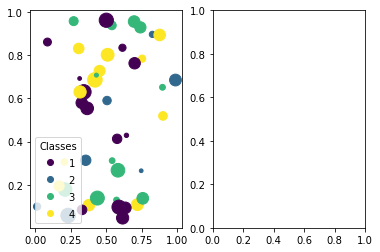

In [1]:
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots(1,2)

scatter = ax[0].scatter(x, y, c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax[0].legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
# ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
# handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
# legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

In [ ]:
legend1

The below script generates reco2num_spk using the system rttm and dataset name

In [ ]:
foldpath=/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosineloss_max2overlaps_1_xvec0.75shift_norm_PLDA_scaled/dihard_dev_2020_track1_fbank_jhu/bce_selfsup_20_sumloss_orgpldaadj_spectral_thresholdinit0.5/final_spectral_selfsup_minmaxrttms
dataset=dihard_dev_2020_track1_fbank_jhu
rm -f ${foldpath}/reco2num_spk
cat lists/${dataset}/${dataset}.list | while read i; do
    numspk=`grep $i ${foldpath}/valrttm | awk '{print $8}' | sort | uniq | wc -l`
    echo "$i $numspk" >> ${foldpath}/reco2num_spk
  done

The below script generates filewise rttms using the system generated rttm

In [ ]:
dataset=ami_eval_fbank_0.75s
foldpath=lists/$dataset
mkdir -p $foldpath/filewise_rttms
cat lists/${dataset}/${dataset}.list | while read i; do
 grep $i $foldpath/rttm > $foldpath/filewise_rttms/${i}.rttm
done

Below script is to split the file list into #totalsplit etc. and put each list into the split$nj/Splitcount folder e.g. = split15/1

In [ ]:
import numpy as np
import os
from pdb import set_trace as bp
totalfiles=414
totalsplits=15

# os.system('./path.sh')
#filelist=open('lists/test_mixture.list').readlines()
foldpath='lists/ami_eval_fbank_0.75s'
#listname='val.list'
listname='full.list'
nfile=len(open(f'{foldpath}/ami_eval_fbank_0.75s.list').readlines())
filelist = np.arange(nfile)
np.savetxt(f'{foldpath}/{listname}', filelist,delimiter=',')
filelist=open('{}/{}'.format(foldpath,listname)).readlines()

splitlist = np.array_split(filelist,totalsplits)
for i,split in enumerate(splitlist):
    writefold='{}/split{}/{}'.format(foldpath,totalsplits,i+1)
    cmd='mkdir -p {}'.format(writefold)
    os.system(cmd)
    # bp()
    filename=split[0].rsplit()[0]
    print(filename)
    
    #continue
    a1=open('{}/{}'.format(writefold,listname),'w')
    a1.writelines(split)
    a1.close()

In [ ]:

filename = 'IB4011'
path1= 'exp/ami_sdm_dev/plda_adj_A_0.75s/'
path2 = 'exp/ami_dev_fbank_0.75s/plda_adj_A_0.75s/'

scoresnew = pkl.load(open(f'{path1}/{filename}.pkl','rb'))
scoresold = pkl.load(open(f'{path2}/AMI_{filename}_SDM.pkl','rb'))
%matplotlib inline
plt.figure()
plt.subplot(1,2,1)
plt.imshow(scoresnew)
plt.title('scoresnew')

plt.subplot(1,2,2)
plt.imshow(scoresold)
plt.title('scoresold')


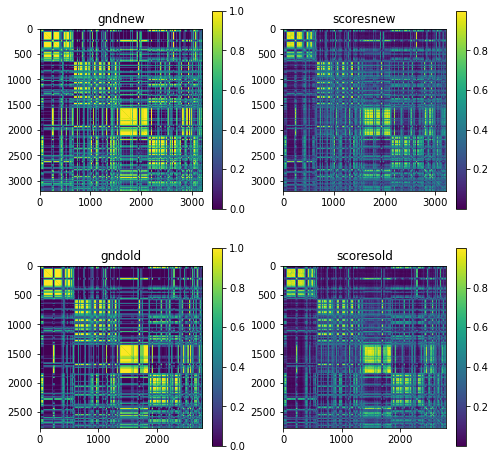

In [5]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp

filename = 'IB4011'

path1= 'exp/ami_sdm_dev/plda_adj_A_0.75s/'
path2 = 'exp/ami_dev_fbank_0.75s/plda_adj_A_0.75s/'

scoresnew = pkl.load(open(f'{path1}/{filename}.pkl','rb'))
scoresold = pkl.load(open(f'{path2}/AMI_{filename}_SDM.pkl','rb'))


path1= 'exp/ami_sdm_dev/ground_adj_cent/'
path2 = 'exp/ami_dev_fbank_0.75s/ground_adj_cent/'

gndnew = pkl.load(open(f'{path1}/{filename}.pkl','rb'))['adj_overlap']
gndold = pkl.load(open(f'{path2}/AMI_{filename}_SDM.pkl','rb'))['adj_overlap']
gndnew = gndnew.toarray()
gndold = gndold.toarray()
# %matplotlib qt
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(gndnew)
plt.title('gndnew')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(scoresnew)
plt.title('scoresnew')
plt.colorbar()
# %matplotlib inline
# plt.figure()
plt.subplot(2,2,3)
plt.imshow(gndold)
plt.title('gndold')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(scoresold)
plt.title('scoresold')
plt.colorbar()
plt.savefig('test_images/scores_comparison.pdf')
plt.show()



Below script plots affinity matrices after training GNN model using AMI train set using only clean segments and testing using AMI dev set all segments. For training and testing both we use 1.5sec xvector with 0.75sec shift. The script also plots scores' histogram 

AMI_ES2011a_SDM
MSE clean:0.35
MSE overlap:0.21
AMI_ES2011b_SDM
MSE clean:0.39
MSE overlap:0.28


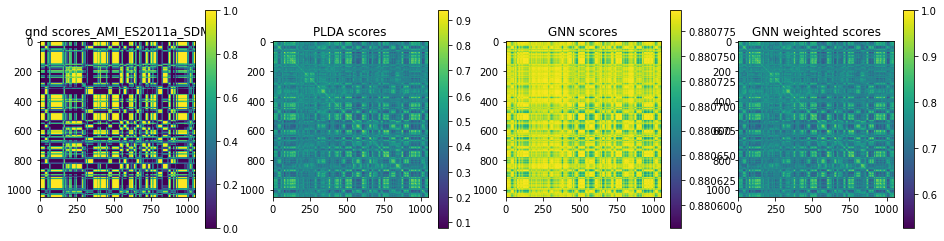

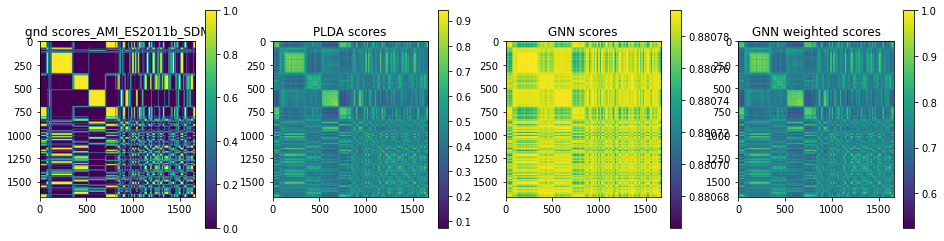

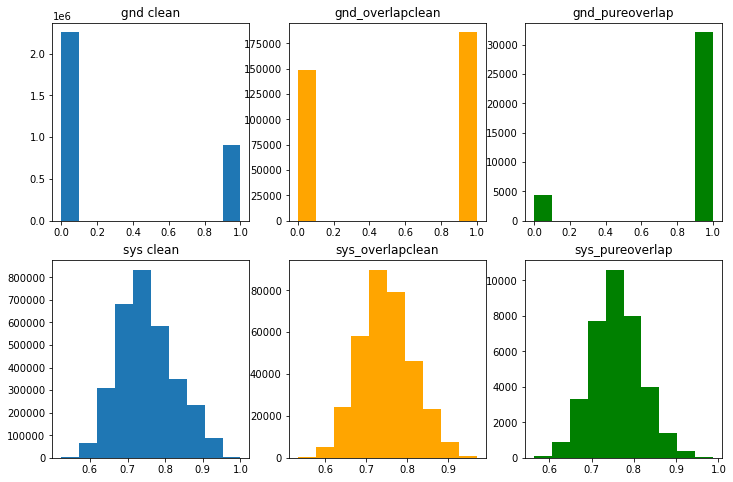

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp
from scipy.special import expit,logit
import itertools
import networkx as nx


dataset_str='ami_dev_fbank_0.75s'

# filelist = ! ls {outf}/scores/*.npy
# scorespathlearnt = '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_expdist_sigma1.0_max2overlaps_1_xvec0.75shift_PLDA_scaled/val_loss_40/scores_expdist'
# modeltype='ae_norm_cosineloss'

modeltype='ae_norm_cosinesoftmaxloss_angleproto'
# modeltype='ae_norm_cosinesoftmaxloss_angleproto_quadratic'
# scorespathlearnt = f'exp_march/results_spec_sup_{modeltype}_clean_0_xvec0.75shift_norm_PLDA_scaled/_avg_accumgradient_use_gnd_adj/{dataset_str}/results_sup_pic/score_affine'

# scorespathlearnt = f'exp_march/results_spec_sup_{modeltype}_clean_0_xvec0.75shift_norm_PLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda/{dataset_str}/results_sup_pic_widePLDA/score_affine_epochs50'
trainset='ami_sdm_train'
# scorespathlearnt = f'exp_march/results_spec_sup_{modeltype}_clean_0_xvec0.75shift_norm_PLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda/{trainset}/with_w2_b-0.5_continue_v2/{dataset_str}/results_sup_pic_widePLDA/score_affine_epochs50'

# scorespathlearnt = f'exp_march/results_spec_sup_{modeltype}_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_knninit50/{dataset_str}/results_sup_pic_AmiPLDA/score_affine_epochs30'

# scorespathlearnt = f'exp_march/results_spec_sup_{modeltype}_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/{trainset}/with_w2_1_b2_0.0/{dataset_str}/results_sup_spectral_AmiPLDA/score_affine_epochs50'
# scorespathlearnt = f'exp_march/results_spec_sup_{modeltype}_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/{trainset}/with_w2_1_b2_0.0/{dataset_str}/results_sup_spectral_AmiPLDA/score_affine_knn50_epochs50'
w=2
b=0
scorespathlearnt = f'exp_march/results_PLDApic_randomweights/with_w_{w}_b_{b}/score_affine_epochs50/'
# pldapath= '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp/ami_dev_fbank_0.75s/plda_adj_A_0.75s'
pldapath= '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp/ami_dev_fbank_0.75s/plda_ami_adj_A_0.75s'

gndlabelspath = './tools_diar'

filepath = 'lists/{}/file_val'.format(dataset_str)
filelist = np.genfromtxt(filepath,dtype=str)
# filelist = np.sort(np.genfromtxt(filepath,dtype=str))
# filelist = ! ls {outf}/scores_cos/*.npy
full_ground_scores_clean = []
full_sys_scores_clean = []

full_gnd_scores_overlapclean = []
full_gnd_scores_pureoverlap = []
full_sys_scores_overlapclean = []
full_sys_scores_pureoverlap = []
for fname in filelist[:2]:
    filename = fname
    print(filename)
    sys_scores = np.load(f'{scorespathlearnt}/{filename}.npy') - 1e-5
    nseg = sys_scores.shape[0]
    sys_scores1 = 1/(1+np.exp(-sys_scores))
    # sys_scores1 = (sys_scores+1.0)/2.0
    # sys_scores1 = sys_scores
    # sys_scores1[sys_scores1<0.7] = 0
    # if np.min(sys_scores)<0:
        # sys_scores1 = (sys_scores-np.min(sys_scores))/(np.max(sys_scores)-np.min(sys_scores))


    plda_scores = pkl.load(open(f'{pldapath}/{filename}.pkl','rb'))
    # plda_scores = expit(logit(plda_scores)*10)
    sys_scores = sys_scores1 * (sys_scores1+plda_scores)
    # sys_scores = sys_scores1 * plda_scores
    sys_scores /=np.max(sys_scores)
    filepath1 = f'exp/{dataset_str}/ground_adj_cent/{filename}.pkl'
    ground_labels=open(f'{gndlabelspath}/ALL_GROUND_LABELS/{dataset_str}/threshold_0.5_avg/labels_{filename}').readlines()
    full_gndlist=[g.split()[1:] for g in ground_labels]
    clean_list = np.array([len(f) for f in full_gndlist])
    clean_ind = np.where(clean_list == 1)[0]
    overlap_ind = np.where(clean_list > 1.0)[0]

    ground_scores = pkl.load(open(filepath1,'rb'))['adj_overlap'].toarray() + np.eye(nseg) 
    # adj, _, _, _ = load_data_simu(dataset_str,filename,device='cpu',useoverlap=1,set='val',batch=None)
    # ground_scores = adj.toarray() + np.eye(nseg) 
    # clean_ind loss
    ground_scores_clean = ground_scores[np.ix_(clean_ind,clean_ind)]
    sys_scores_clean = sys_scores[np.ix_(clean_ind,clean_ind)]

    # BCE loss
    # clean_loss = -ground_scores_clean * np.log(sys_scores_clean)-(1-ground_scores_clean)*np.log(1-sys_scores_clean)

    # clean_loss = clean_loss[np.triu_indices(ground_scores_clean.shape[0], k = 1)]
    # clean_bce_loss = np.round(clean_loss.mean(),2)
    # print(f'total_clean_loss:{np.round(clean_loss.sum(),2)} average clean loss: {clean_bce_loss} ')
    sys_scores_overlap = []
    ground_scores_overlap = []
    #overlap_ind loss
    if len(overlap_ind) > 0:
        ground_scores_overlap = ground_scores[overlap_ind]
        sys_scores_overlap = sys_scores[overlap_ind]
        
        # overlap_loss = -ground_scores_overlap * np.log(sys_scores_overlap)-(1-ground_scores_overlap)*np.log(1-sys_scores_overlap)

        # print(f'total_overlaps:{len(overlap_ind)} total_overlap_loss:{np.round(overlap_loss.sum(),2)} average overlap loss: {np.round(overlap_loss.mean(),2)} ')
        
    # MSE loss
    clean_mse_loss = ((ground_scores_clean - sys_scores_clean)**2)
    clean_mse_loss = clean_mse_loss[np.triu_indices(ground_scores_clean.shape[0], k = 1)]
    print(f'MSE clean:{np.round(clean_mse_loss.mean(),2)}')
    if len(overlap_ind) > 0:
        overlap_mse_loss = ((ground_scores_overlap - sys_scores_overlap)**2).mean()
        print(f'MSE overlap:{np.round(overlap_mse_loss,2)}')
    # if clean_bce_loss < 0.8:
    # if filename == 'DH_DEV_0238':
    # %matplotlib inline
    plt.figure(figsize=(16,4))
    plt.subplot(1,4,1)
    plt.imshow(ground_scores)
    plt.title(f'gnd scores_{filename}')
    plt.colorbar()
    plt.subplot(1,4,2)
    plt.imshow(plda_scores)
    plt.title('PLDA scores')
    plt.colorbar()
    plt.subplot(1,4,3)
    plt.imshow(sys_scores1)
    plt.title('GNN scores')
    plt.colorbar()
    plt.subplot(1,4,4)
    plt.imshow(sys_scores)
    plt.title('GNN weighted scores')
    plt.colorbar()

    full_ground_scores_clean.append(ground_scores_clean.reshape(-1,))
    full_sys_scores_clean.append(sys_scores_clean.reshape(-1,))
    if len(overlap_ind)> 0:
        sys_scores_pureoverlap = sys_scores_overlap[:,overlap_ind]
        sys_scores_overlapclean = sys_scores_overlap[:,clean_ind]
        
        gnd_scores_pureoverlap = ground_scores_overlap[:,overlap_ind]
        gnd_scores_overlapclean = ground_scores_overlap[:,clean_ind]
        full_gnd_scores_overlapclean.append(gnd_scores_overlapclean.reshape(-1,))
        full_gnd_scores_pureoverlap.append(gnd_scores_pureoverlap.reshape(-1,))

        full_sys_scores_overlapclean.append(sys_scores_overlapclean.reshape(-1,))
        full_sys_scores_pureoverlap.append(sys_scores_pureoverlap.reshape(-1,))
        # %matplotlib inline
        # plt.figure(figsize=(12,8))
        # plt.subplot(2,3,1)
        # plt.hist(ground_scores_clean.reshape(-1,))
        # plt.title('gnd clean')
        # plt.subplot(2,3,2)
        # plt.hist(gnd_scores_overlapclean.reshape(-1,),color='orange')
        # plt.title('gnd_overlapclean')
        # plt.subplot(2,3,3)
        # plt.hist(gnd_scores_pureoverlap.reshape(-1,),color='green')
        # plt.title('gnd_pureoverlap')
        # plt.subplot(2,3,4)
        # plt.hist(sys_scores_clean.reshape(-1,))
        # plt.title('sys clean')
        # plt.subplot(2,3,5)
        # plt.hist(sys_scores_overlapclean.reshape(-1,),color='orange')
        # plt.title('sys_overlapclean')
        # plt.subplot(2,3,6)
        # plt.hist(sys_scores_pureoverlap.reshape(-1,),color='green')
        # plt.title('sys_pureoverlap')
        # plt.show()
    # else:
    #     plt.figure(figsize=(12,8))
    #     plt.subplot(2,3,1)
    #     plt.hist(ground_scores_clean.reshape(-1,))
    #     plt.title('gnd clean')
    #     plt.subplot(2,3,2)
    #     # plt.hist(ground_scores_overlap.reshape(-1,),color='orange')
    #     plt.subplot(2,3,4)
    #     plt.hist(sys_scores_clean.reshape(-1,))
    #     plt.title('sys clean')
    #     plt.subplot(2,3,5)
    #     # plt.hist(sys_scores_overlapclean.reshape(-1,),color='orange')
    #     # plt.subplot(2,3,6)
    #     # plt.hist(sys_scores_pureoverlap.reshape(-1,),color='green')
    #     plt.show()
    # if '121' in fname:
    #     break
    # break
        # print(filename)
        # break

full_ground_scores_clean = np.concatenate( full_ground_scores_clean, axis=0 )
full_gnd_scores_overlapclean = np.concatenate(full_gnd_scores_overlapclean,axis=0)
full_gnd_scores_pureoverlap = np.concatenate(full_gnd_scores_pureoverlap,axis=0)
full_sys_scores_clean = np.concatenate(full_sys_scores_clean,axis=0)
full_sys_scores_overlapclean = np.concatenate(full_sys_scores_overlapclean,axis=0)
full_sys_scores_pureoverlap = np.concatenate(full_sys_scores_pureoverlap,axis=0)
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.hist(full_ground_scores_clean)
plt.title('gnd clean')
plt.subplot(2,3,2)
plt.hist(full_gnd_scores_overlapclean,color='orange')
plt.title('gnd_overlapclean')
plt.subplot(2,3,3)
plt.hist(full_gnd_scores_pureoverlap,color='green')
plt.title('gnd_pureoverlap')
plt.subplot(2,3,4)
plt.hist(full_sys_scores_clean)
plt.title('sys clean')
plt.subplot(2,3,5)
plt.hist(full_sys_scores_overlapclean,color='orange')
plt.title('sys_overlapclean')
plt.subplot(2,3,6)
plt.hist(full_sys_scores_pureoverlap,color='green')
plt.title('sys_pureoverlap')
plt.show()


Below script plots affinities with Random weights for GCN with different w and b config

AMI_ES2011a_SDM
MSE clean:0.3
MSE overlap:0.2
AMI_ES2011b_SDM
MSE clean:0.34
MSE overlap:0.25
AMI_ES2011a_SDM
MSE clean:0.3
MSE overlap:0.21
AMI_ES2011b_SDM
MSE clean:0.34
MSE overlap:0.24
AMI_ES2011a_SDM
MSE clean:0.34
MSE overlap:0.21
AMI_ES2011b_SDM
MSE clean:0.4
MSE overlap:0.27
AMI_ES2011a_SDM
MSE clean:0.34
MSE overlap:0.21
AMI_ES2011b_SDM
MSE clean:0.4
MSE overlap:0.27


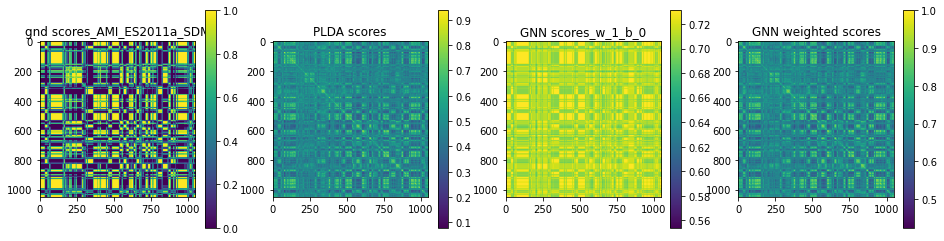

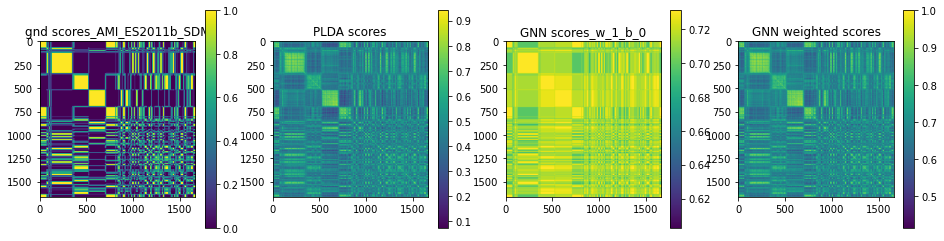

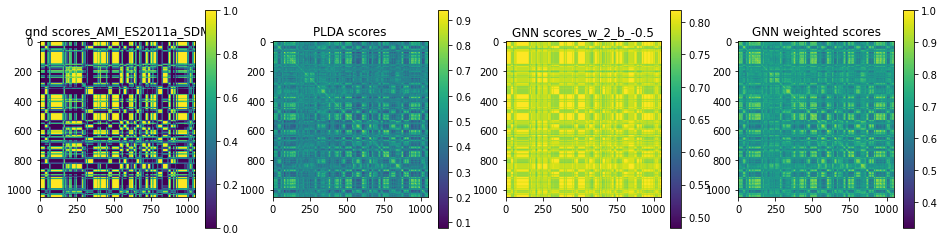

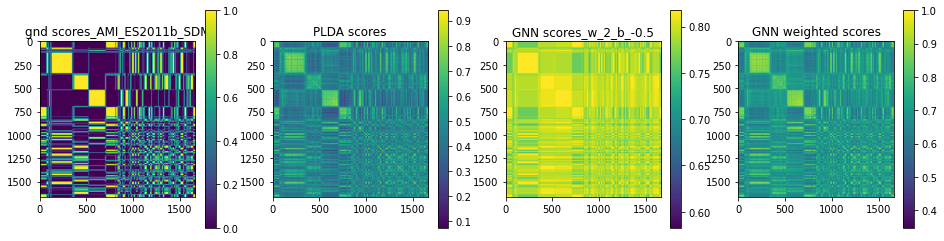

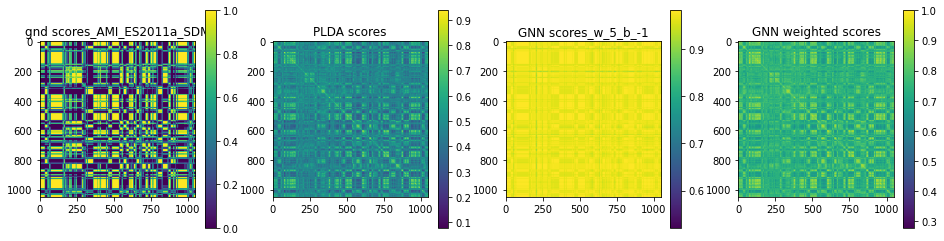

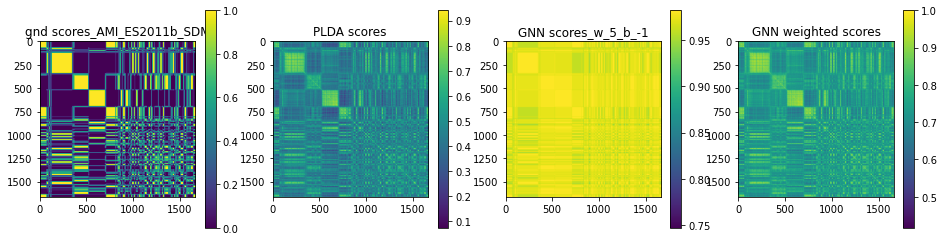

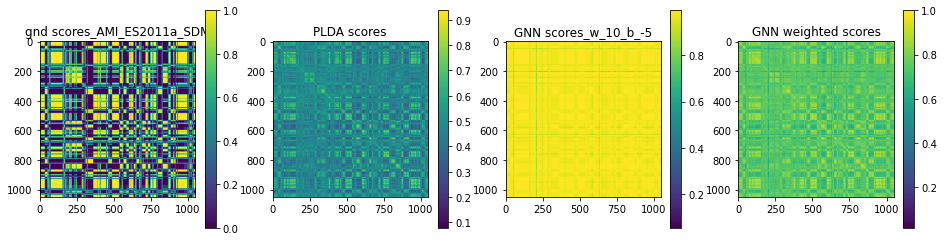

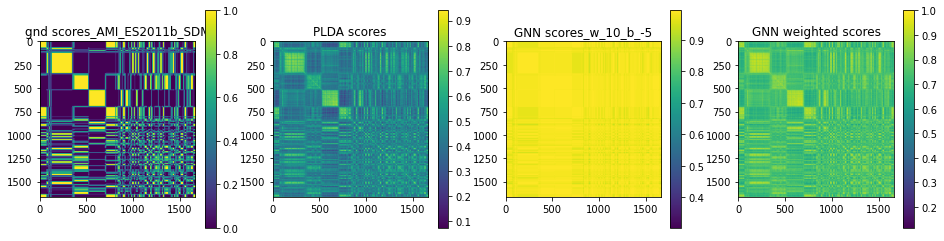

In [5]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp
from scipy.special import expit,logit
import itertools
import networkx as nx


dataset_str='ami_dev_fbank_0.75s'

# filelist = ! ls {outf}/scores/*.npy
# scorespathlearnt = '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_expdist_sigma1.0_max2overlaps_1_xvec0.75shift_PLDA_scaled/val_loss_40/scores_expdist'
# modeltype='ae_norm_cosineloss'

modeltype='ae_norm_cosinesoftmaxloss_angleproto'
# modeltype='ae_norm_cosinesoftmaxloss_angleproto_quadratic'
# scorespathlearnt = f'exp_march/results_spec_sup_{modeltype}_clean_0_xvec0.75shift_norm_PLDA_scaled/_avg_accumgradient_use_gnd_adj/{dataset_str}/results_sup_pic/score_affine'

# scorespathlearnt = f'exp_march/results_spec_sup_{modeltype}_clean_0_xvec0.75shift_norm_PLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda/{dataset_str}/results_sup_pic_widePLDA/score_affine_epochs50'
trainset='ami_sdm_train'
# scorespathlearnt = f'exp_march/results_spec_sup_{modeltype}_clean_0_xvec0.75shift_norm_PLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda/{trainset}/with_w2_b-0.5_continue_v2/{dataset_str}/results_sup_pic_widePLDA/score_affine_epochs50'

# scorespathlearnt = f'exp_march/results_spec_sup_{modeltype}_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_knninit50/{dataset_str}/results_sup_pic_AmiPLDA/score_affine_epochs30'

# scorespathlearnt = f'exp_march/results_spec_sup_{modeltype}_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/{trainset}/with_w2_1_b2_0.0/{dataset_str}/results_sup_spectral_AmiPLDA/score_affine_epochs50'
# scorespathlearnt = f'exp_march/results_spec_sup_{modeltype}_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/{trainset}/with_w2_1_b2_0.0/{dataset_str}/results_sup_spectral_AmiPLDA/score_affine_knn50_epochs50'
# for w in [1,2,5,10]:
# [2,-0.5][10,-5]
for param in [[1,0],[5,-1]]:
    w = param[0]
    b = param[1]
    # scorespathlearnt = f'exp_march/results_PLDApic_randomweights/with_w_{w}_b_{b}_gndadj/score_affine_epochs50/'
    scorespathlearnt=f'exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/ami_dev_fbank_0.75s/results_sup_pic_AmiPLDA_withgndadj_epochs50/score_affine_epochs50/'
    # pldapath= '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp/ami_dev_fbank_0.75s/plda_adj_A_0.75s'
    pldapath= '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp/ami_dev_fbank_0.75s/plda_ami_adj_A_0.75s'

    gndlabelspath = './tools_diar'

    filepath = 'lists/{}/file_val'.format(dataset_str)
    filelist = np.genfromtxt(filepath,dtype=str)
    # filelist = np.sort(np.genfromtxt(filepath,dtype=str))
    # filelist = ! ls {outf}/scores_cos/*.npy
    full_ground_scores_clean = []
    full_sys_scores_clean = []

    full_gnd_scores_overlapclean = []
    full_gnd_scores_pureoverlap = []
    full_sys_scores_overlapclean = []
    full_sys_scores_pureoverlap = []
    for fname in filelist[:2]:
        filename = fname
        print(filename)
        sys_scores = np.load(f'{scorespathlearnt}/{filename}.npy') - 1e-5
        nseg = sys_scores.shape[0]
        sys_scores1 = 1/(1+np.exp(-sys_scores))
        # sys_scores1 = (sys_scores+1.0)/2.0
        # sys_scores1 = sys_scores
        # sys_scores1[sys_scores1<0.0] = 0
        # if np.min(sys_scores)<0:
            # sys_scores1 = (sys_scores-np.min(sys_scores))/(np.max(sys_scores)-np.min(sys_scores))


        plda_scores = pkl.load(open(f'{pldapath}/{filename}.pkl','rb'))
        # plda_scores = expit(logit(plda_scores)*10)
        sys_scores = sys_scores1 * (sys_scores1+plda_scores)
        # sys_scores = sys_scores1 * plda_scores
        sys_scores /=np.max(sys_scores)
        filepath1 = f'exp/{dataset_str}/ground_adj_cent/{filename}.pkl'
        ground_labels=open(f'{gndlabelspath}/ALL_GROUND_LABELS/{dataset_str}/threshold_0.5_avg/labels_{filename}').readlines()
        full_gndlist=[g.split()[1:] for g in ground_labels]
        clean_list = np.array([len(f) for f in full_gndlist])
        clean_ind = np.where(clean_list == 1)[0]
        overlap_ind = np.where(clean_list > 1.0)[0]

        ground_scores = pkl.load(open(filepath1,'rb'))['adj_overlap'].toarray() + np.eye(nseg) 
        # adj, _, _, _ = load_data_simu(dataset_str,filename,device='cpu',useoverlap=1,set='val',batch=None)
        # ground_scores = adj.toarray() + np.eye(nseg) 
        # clean_ind loss
        ground_scores_clean = ground_scores[np.ix_(clean_ind,clean_ind)]
        sys_scores_clean = sys_scores[np.ix_(clean_ind,clean_ind)]

        # BCE loss
        # clean_loss = -ground_scores_clean * np.log(sys_scores_clean)-(1-ground_scores_clean)*np.log(1-sys_scores_clean)

        # clean_loss = clean_loss[np.triu_indices(ground_scores_clean.shape[0], k = 1)]
        # clean_bce_loss = np.round(clean_loss.mean(),2)
        # print(f'total_clean_loss:{np.round(clean_loss.sum(),2)} average clean loss: {clean_bce_loss} ')
        sys_scores_overlap = []
        ground_scores_overlap = []
        #overlap_ind loss
        if len(overlap_ind) > 0:
            ground_scores_overlap = ground_scores[overlap_ind]
            sys_scores_overlap = sys_scores[overlap_ind]
            
            # overlap_loss = -ground_scores_overlap * np.log(sys_scores_overlap)-(1-ground_scores_overlap)*np.log(1-sys_scores_overlap)

            # print(f'total_overlaps:{len(overlap_ind)} total_overlap_loss:{np.round(overlap_loss.sum(),2)} average overlap loss: {np.round(overlap_loss.mean(),2)} ')
            
        # MSE loss
        clean_mse_loss = ((ground_scores_clean - sys_scores_clean)**2)
        clean_mse_loss = clean_mse_loss[np.triu_indices(ground_scores_clean.shape[0], k = 1)]
        print(f'MSE clean:{np.round(clean_mse_loss.mean(),2)}')
        if len(overlap_ind) > 0:
            overlap_mse_loss = ((ground_scores_overlap - sys_scores_overlap)**2).mean()
            print(f'MSE overlap:{np.round(overlap_mse_loss,2)}')
        # if clean_bce_loss < 0.8:
        # if filename == 'DH_DEV_0238':
        # %matplotlib inline
        plt.figure(figsize=(16,4))
        
        plt.subplot(1,4,1)
        plt.imshow(ground_scores)
        plt.title(f'gnd scores_{filename}')
        plt.colorbar()
        plt.subplot(1,4,2)
        plt.imshow(plda_scores)
        plt.title('PLDA scores')
        plt.colorbar()
        plt.subplot(1,4,3)
        plt.imshow(sys_scores1)
        plt.title(f'GNN scores_w_{w}_b_{b}')
        plt.colorbar()
        plt.subplot(1,4,4)
        plt.imshow(sys_scores)
        plt.title('GNN weighted scores')
        plt.colorbar()

        full_ground_scores_clean.append(ground_scores_clean.reshape(-1,))
        full_sys_scores_clean.append(sys_scores_clean.reshape(-1,))
        if len(overlap_ind)> 0:
            sys_scores_pureoverlap = sys_scores_overlap[:,overlap_ind]
            sys_scores_overlapclean = sys_scores_overlap[:,clean_ind]
            
            gnd_scores_pureoverlap = ground_scores_overlap[:,overlap_ind]
            gnd_scores_overlapclean = ground_scores_overlap[:,clean_ind]
            full_gnd_scores_overlapclean.append(gnd_scores_overlapclean.reshape(-1,))
            full_gnd_scores_pureoverlap.append(gnd_scores_pureoverlap.reshape(-1,))

            full_sys_scores_overlapclean.append(sys_scores_overlapclean.reshape(-1,))
            full_sys_scores_pureoverlap.append(sys_scores_pureoverlap.reshape(-1,))
        
   

    # full_ground_scores_clean = np.concatenate( full_ground_scores_clean, axis=0 )
    # full_gnd_scores_overlapclean = np.concatenate(full_gnd_scores_overlapclean,axis=0)
    # full_gnd_scores_pureoverlap = np.concatenate(full_gnd_scores_pureoverlap,axis=0)
    # full_sys_scores_clean = np.concatenate(full_sys_scores_clean,axis=0)
    # full_sys_scores_overlapclean = np.concatenate(full_sys_scores_overlapclean,axis=0)
    # full_sys_scores_pureoverlap = np.concatenate(full_sys_scores_pureoverlap,axis=0)
    # plt.figure(figsize=(12,8))
    # plt.subplot(2,3,1)
    # plt.hist(full_ground_scores_clean)
    # plt.title('gnd clean')
    # plt.subplot(2,3,2)
    # plt.hist(full_gnd_scores_overlapclean,color='orange')
    # plt.title('gnd_overlapclean')
    # plt.subplot(2,3,3)
    # plt.hist(full_gnd_scores_pureoverlap,color='green')
    # plt.title('gnd_pureoverlap')
    # plt.subplot(2,3,4)
    # plt.hist(full_sys_scores_clean)
    # plt.title('sys clean')
    # plt.subplot(2,3,5)
    # plt.hist(full_sys_scores_overlapclean,color='orange')
    # plt.title('sys_overlapclean')
    # plt.subplot(2,3,6)
    # plt.hist(full_sys_scores_pureoverlap,color='green')
    # plt.title('sys_pureoverlap')
    # plt.show()


AMI_ES2011a_SDM
MSE clean:0.26
MSE overlap:0.2
AMI_ES2011b_SDM
MSE clean:0.31
MSE overlap:0.28
AMI_ES2011c_SDM
MSE clean:0.37
MSE overlap:0.28
AMI_ES2011d_SDM
MSE clean:0.41
MSE overlap:0.31
AMI_IB4001_SDM
MSE clean:0.11
MSE overlap:0.26
AMI_IB4002_SDM
MSE clean:0.21
MSE overlap:0.27
AMI_IB4003_SDM
MSE clean:0.2
MSE overlap:0.21
AMI_IB4004_SDM
MSE clean:0.3
MSE overlap:0.16
AMI_IB4010_SDM
MSE clean:0.04
MSE overlap:0.23
AMI_IB4011_SDM
MSE clean:0.05
MSE overlap:0.24
AMI_IS1008a_SDM
MSE clean:0.11
MSE overlap:0.13
AMI_IS1008b_SDM
MSE clean:0.15
MSE overlap:0.2
AMI_IS1008c_SDM
MSE clean:0.11
MSE overlap:0.17
AMI_IS1008d_SDM
MSE clean:0.1
MSE overlap:0.19
AMI_TS3004a_SDM
MSE clean:0.28
MSE overlap:0.25
AMI_TS3004b_SDM
MSE clean:0.53
MSE overlap:0.36
AMI_TS3004c_SDM
MSE clean:0.57
MSE overlap:0.36
AMI_TS3004d_SDM
MSE clean:0.57
MSE overlap:0.35


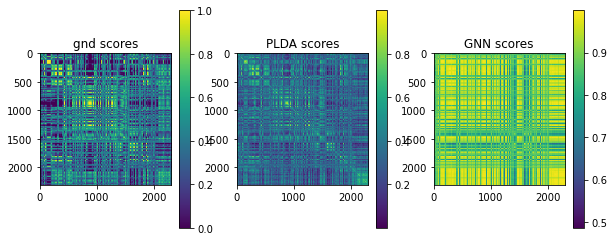

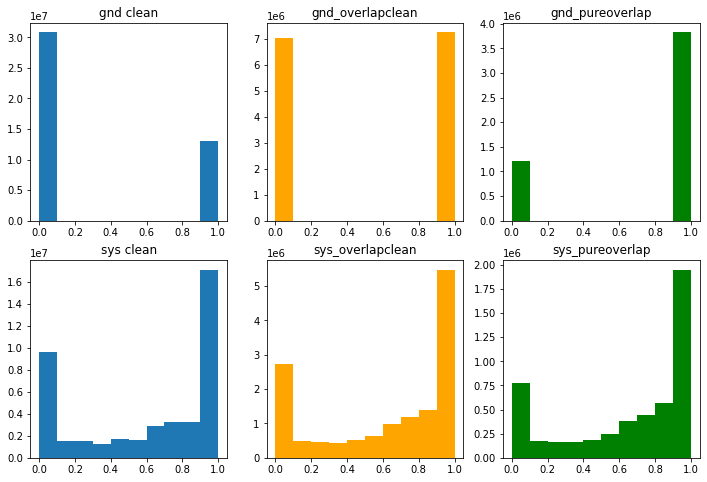

In [20]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp
import torch

import itertools
import networkx as nx

def load_data_simu(dataset,filename,device='cpu',useoverlap=1,set='val',batch=None):
    # load the data: x, tx, allx, graph
    # bp()
    if batch is None:
        if set=='train':
            if useoverlap:
                filepath = f'exp/{dataset}/ground_adj_cent_max2overlap/{filename}.pkl'
                cmd = f'mkdir -p exp/{dataset}/ground_adj_cent_max2overlap/'
            else:
                filepath = f'exp/{dataset}/ground_adj_cent_clean/{filename}.pkl'
                cmd = f'mkdir -p exp/{dataset}/ground_adj_cent_clean/'
            ground_labels=open('/data1/prachis/Dihard_2020/gae-pytorch/gae/tools_diar/ALL_GROUND_LABELS/'+dataset+'/threshold_0.5/labels_'+filename).readlines()

        else:
            filepath = f'exp/{dataset}/ground_adj_cent_noavg/{filename}.pkl'
            cmd = f'mkdir -p exp/{dataset}/ground_adj_cent_noavg/'
            ground_labels=open('/data1/prachis/Dihard_2020/gae-pytorch/gae/tools_diar/ALL_GROUND_LABELS/'+dataset+'/threshold_0.5/labels_'+filename).readlines()

        xvecpath = '/data1/prachis/Dihard_2020/gae-pytorch/gae/tools_diar/xvectors_0.75s_npy/{}/'.format(dataset)
        # ground_labels=open('/data1/prachis/Dihard_2020/gae-pytorch/gae/tools_diar/ALL_GROUND_LABELS/'+dataset+'/threshold_0.5_avg/labels_'+filename).readlines()
        
        os.system(cmd)
        
        # dataset = 'dihard_dev_2020_track1_fbank_jhu'
        # print('filename:',filename)
        X = np.load('{}/{}.npy'.format(xvecpath,filename))
        features = torch.FloatTensor(X).to(device)

    else:
        filepath = f'exp/{dataset}/ground_adj_cent_max2overlap_batch/{filename[0]}.pkl'
        cmd = f'mkdir -p exp/{dataset}/ground_adj_cent_max2overlap_batch/'
        os.system(cmd)
        
        X = []
        ground_labels = []
        for f in filename:
            xvecpath = 'tools_diar/xvectors_0.75s_npy/{}/'.format(dataset)
            ground_label=open('tools_diar/ALL_GROUND_LABELS/'+dataset+'/threshold_0.5_avg/labels_'+f).readlines()
            ground_labels.extend(ground_label)
            X.append(np.load('{}/{}.npy'.format(xvecpath,f)))
        
        X = np.concatenate(X,axis=0)
        
        features = torch.FloatTensor(X).to(device)
    
    full_gndlist=[g.split()[1:] for g in ground_labels]
    gnd_list = np.array([g[0] for g in full_gndlist])
    uni_gnd_letter = np.unique(gnd_list)

    clean_list = np.array([len(f) for f in full_gndlist])
    clean_ind =np.where(clean_list ==1)[0]
    max2ovp_ind = np.where(clean_list <=2 )[0]
    
    if os.path.isfile(filepath):
        with open(filepath,'rb') as fb:
            mydict = pkl.load(fb)
        adj = mydict['adj_overlap']
        # final_cent = mydict['cent']
        return adj, features, clean_ind, max2ovp_ind
    if set == 'train':
        overlap_ind = np.where(clean_list ==2 )[0] # only 2 speakers overlap
    else:
        overlap_ind = np.where(clean_list > 1.0)[0]
    
    overlap_gnd_list = np.array([full_gndlist[oi][1] for oi in overlap_ind])
    uni_overlap_letter = np.unique(overlap_gnd_list)
    uni_gnd_letter = np.unique(np.hstack((uni_gnd_letter,uni_overlap_letter)))
    # plt.figure()
    # G = nx.Graph()
    G = nx.OrderedGraph()
    pos = nx.spring_layout(G)
    N = len(gnd_list)
    L = np.arange(N)
    G.add_nodes_from(L)
    if useoverlap:
        for ind in uni_gnd_letter:
            L = np.where(gnd_list==ind)[0] 
            L2 = np.where(overlap_gnd_list==ind)[0]
            overlap_L =  overlap_ind[L2]
            full_L = np.unique(np.hstack((L,overlap_L)))
            edges = itertools.combinations(full_L,2)
            G.add_edges_from(edges)
    else:
        gnd_clean_ind = gnd_list[clean_ind]
        for ind in uni_gnd_letter:
            L = np.where(gnd_clean_ind==ind)[0] 
            clean_L = clean_ind[L]
            edges = itertools.combinations(clean_L,2)
            G.add_edges_from(list(edges))
    
    adj = nx.adjacency_matrix(G)
    mydict = {}
    mydict['adj_overlap']= adj
    with open(filepath,'wb') as fb:
        pkl.dump(mydict,fb)
    return adj, features, clean_ind, max2ovp_ind

dataset_str='ami_dev_fbank_0.75s'

# filelist = ! ls {outf}/scores/*.npy
# scorespathlearnt = '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_expdist_sigma1.0_max2overlaps_1_xvec0.75shift_PLDA_scaled/val_loss_40/scores_expdist'
modeltype='ae_norm_cosineloss'
scorespathlearnt = f'exp_march/results_spec_sup_{modeltype}_clean_0_xvec0.75shift_norm_PLDA_scaled/_avg_accumgradient_use_gnd_adj/{dataset_str}/results_sup_pic/score_affine'
pldapath= '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp/ami_dev_fbank_0.75s/plda_adj_A_0.75s'
gndlabelspath = './tools_diar'

filepath = 'lists/{}/file_val'.format(dataset_str)
filelist = np.genfromtxt(filepath,dtype=str)
# filelist = np.sort(np.genfromtxt(filepath,dtype=str))
# filelist = ! ls {outf}/scores_cos/*.npy
full_ground_scores_clean = []
full_sys_scores_clean = []

full_gnd_scores_overlapclean = []
full_gnd_scores_pureoverlap = []
full_sys_scores_overlapclean = []
full_sys_scores_pureoverlap = []
for fname in filelist:
    filename = fname
    print(filename)
    sys_scores = np.load(f'{scorespathlearnt}/{filename}.npy') - 1e-5
    nseg = sys_scores.shape[0]
    # sys_scores = 1/(1+np.exp(-sys_scores))
    # sys_scores = (sys_scores+1.0)/2.0
    sys_scores[sys_scores<0] = 0
    # sys_scores = (sys_scores-np.min(sys_scores))/(np.max(sys_scores)-np.min(sys_scores))


    plda_scores = pkl.load(open(f'{pldapath}/{filename}.pkl','rb'))
    # sys_scores = sys_scores * (sys_scores+plda_scores)
    # sys_scores /=np.max(sys_scores)
    # sys_scores  = plda_scores
    filepath1 = f'exp/{dataset_str}/ground_adj_cent/{filename}.pkl'
    ground_labels=open(f'{gndlabelspath}/ALL_GROUND_LABELS/{dataset_str}/threshold_0.5/labels_{filename}').readlines()
    full_gndlist=[g.split()[1:] for g in ground_labels]
    clean_list = np.array([len(f) for f in full_gndlist])
    clean_ind = np.where(clean_list == 1)[0]
    overlap_ind = np.where(clean_list > 1.0)[0]

    # ground_scores = pkl.load(open(filepath1,'rb'))['adj_overlap'].toarray() + np.eye(nseg) 
    adj, _, _, _ = load_data_simu(dataset_str,filename,device='cpu',useoverlap=1,set='val',batch=None)
    ground_scores = adj.toarray() + np.eye(nseg) 
    # clean_ind loss
    ground_scores_clean = ground_scores[np.ix_(clean_ind,clean_ind)]
    sys_scores_clean = sys_scores[np.ix_(clean_ind,clean_ind)]

    # BCE loss
    # clean_loss = -ground_scores_clean * np.log(sys_scores_clean)-(1-ground_scores_clean)*np.log(1-sys_scores_clean)

    # clean_loss = clean_loss[np.triu_indices(ground_scores_clean.shape[0], k = 1)]
    # clean_bce_loss = np.round(clean_loss.mean(),2)
    # print(f'total_clean_loss:{np.round(clean_loss.sum(),2)} average clean loss: {clean_bce_loss} ')
    sys_scores_overlap = []
    ground_scores_overlap = []
    #overlap_ind loss
    if len(overlap_ind) > 0:
        ground_scores_overlap = ground_scores[overlap_ind]
        sys_scores_overlap = sys_scores[overlap_ind]
        
        # overlap_loss = -ground_scores_overlap * np.log(sys_scores_overlap)-(1-ground_scores_overlap)*np.log(1-sys_scores_overlap)

        # print(f'total_overlaps:{len(overlap_ind)} total_overlap_loss:{np.round(overlap_loss.sum(),2)} average overlap loss: {np.round(overlap_loss.mean(),2)} ')
        
    # MSE loss
    clean_mse_loss = ((ground_scores_clean - sys_scores_clean)**2)
    clean_mse_loss = clean_mse_loss[np.triu_indices(ground_scores_clean.shape[0], k = 1)]
    print(f'MSE clean:{np.round(clean_mse_loss.mean(),2)}')
    if len(overlap_ind) > 0:
        overlap_mse_loss = ((ground_scores_overlap - sys_scores_overlap)**2).mean()
        print(f'MSE overlap:{np.round(overlap_mse_loss,2)}')
    # if clean_bce_loss < 0.8:
    # if filename == 'DH_DEV_0238':
    # %matplotlib inline
    plt.figure(figsize=(10,4))
    plt.subplot(1,3,1)
    plt.imshow(ground_scores)
    plt.title('gnd scores')
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.imshow(plda_scores)
    plt.title('PLDA scores')
    plt.colorbar()
    plt.subplot(1,3,3)
    plt.imshow(sys_scores)
    plt.title('GNN scores')
    plt.colorbar()
    full_ground_scores_clean.append(ground_scores_clean.reshape(-1,))
    full_sys_scores_clean.append(sys_scores_clean.reshape(-1,))
    if len(overlap_ind)> 0:
        sys_scores_pureoverlap = sys_scores_overlap[:,overlap_ind]
        sys_scores_overlapclean = sys_scores_overlap[:,clean_ind]
        
        gnd_scores_pureoverlap = ground_scores_overlap[:,overlap_ind]
        gnd_scores_overlapclean = ground_scores_overlap[:,clean_ind]
        full_gnd_scores_overlapclean.append(gnd_scores_overlapclean.reshape(-1,))
        full_gnd_scores_pureoverlap.append(gnd_scores_pureoverlap.reshape(-1,))

        full_sys_scores_overlapclean.append(sys_scores_overlapclean.reshape(-1,))
        full_sys_scores_pureoverlap.append(sys_scores_pureoverlap.reshape(-1,))
        # %matplotlib inline
        # plt.figure(figsize=(12,8))
        # plt.subplot(2,3,1)
        # plt.hist(ground_scores_clean.reshape(-1,))
        # plt.title('gnd clean')
        # plt.subplot(2,3,2)
        # plt.hist(gnd_scores_overlapclean.reshape(-1,),color='orange')
        # plt.title('gnd_overlapclean')
        # plt.subplot(2,3,3)
        # plt.hist(gnd_scores_pureoverlap.reshape(-1,),color='green')
        # plt.title('gnd_pureoverlap')
        # plt.subplot(2,3,4)
        # plt.hist(sys_scores_clean.reshape(-1,))
        # plt.title('sys clean')
        # plt.subplot(2,3,5)
        # plt.hist(sys_scores_overlapclean.reshape(-1,),color='orange')
        # plt.title('sys_overlapclean')
        # plt.subplot(2,3,6)
        # plt.hist(sys_scores_pureoverlap.reshape(-1,),color='green')
        # plt.title('sys_pureoverlap')
        # plt.show()
    # else:
    #     plt.figure(figsize=(12,8))
    #     plt.subplot(2,3,1)
    #     plt.hist(ground_scores_clean.reshape(-1,))
    #     plt.title('gnd clean')
    #     plt.subplot(2,3,2)
    #     # plt.hist(ground_scores_overlap.reshape(-1,),color='orange')
    #     plt.subplot(2,3,4)
    #     plt.hist(sys_scores_clean.reshape(-1,))
    #     plt.title('sys clean')
    #     plt.subplot(2,3,5)
    #     # plt.hist(sys_scores_overlapclean.reshape(-1,),color='orange')
    #     # plt.subplot(2,3,6)
    #     # plt.hist(sys_scores_pureoverlap.reshape(-1,),color='green')
    #     plt.show()
    # if '121' in fname:
    #     break
    # break
        # print(filename)
        # break

full_ground_scores_clean = np.concatenate( full_ground_scores_clean, axis=0 )
full_gnd_scores_overlapclean = np.concatenate(full_gnd_scores_overlapclean,axis=0)
full_gnd_scores_pureoverlap = np.concatenate(full_gnd_scores_pureoverlap,axis=0)
full_sys_scores_clean = np.concatenate(full_sys_scores_clean,axis=0)
full_sys_scores_overlapclean = np.concatenate(full_sys_scores_overlapclean,axis=0)
full_sys_scores_pureoverlap = np.concatenate(full_sys_scores_pureoverlap,axis=0)
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.hist(full_ground_scores_clean)
plt.title('gnd clean')
plt.subplot(2,3,2)
plt.hist(full_gnd_scores_overlapclean,color='orange')
plt.title('gnd_overlapclean')
plt.subplot(2,3,3)
plt.hist(full_gnd_scores_pureoverlap,color='green')
plt.title('gnd_pureoverlap')
plt.subplot(2,3,4)
plt.hist(full_sys_scores_clean)
plt.title('sys clean')
plt.subplot(2,3,5)
plt.hist(full_sys_scores_overlapclean,color='orange')
plt.title('sys_overlapclean')
plt.subplot(2,3,6)
plt.hist(full_sys_scores_pureoverlap,color='green')
plt.title('sys_pureoverlap')
plt.show()


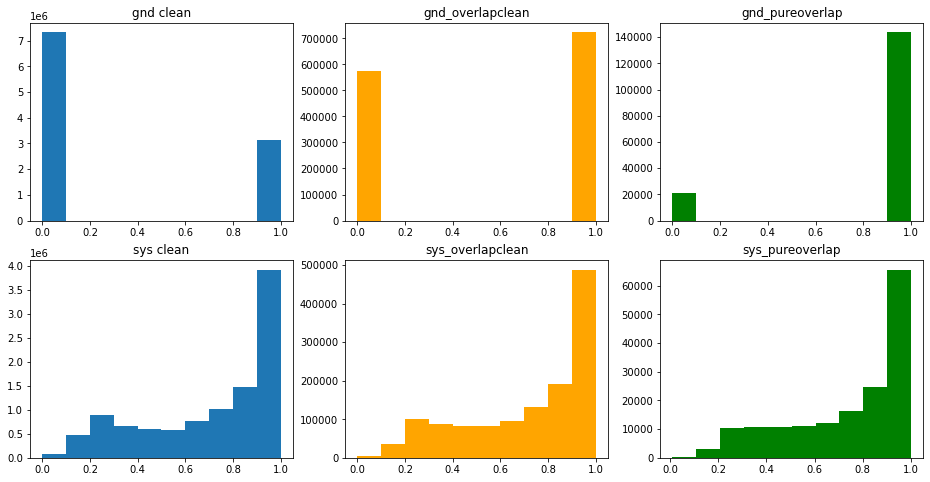

In [50]:
# full_ground_scores_clean = np.concatenate( full_ground_scores_clean, axis=0 )
# full_gnd_scores_overlapclean = np.concatenate(full_gnd_scores_overlapclean,axis=0)
# full_gnd_scores_pureoverlap = np.concatenate(full_gnd_scores_pureoverlap,axis=0)
# full_sys_scores_clean = np.concatenate(full_sys_scores_clean,axis=0)
# full_sys_scores_overlapclean = np.concatenate(full_sys_scores_overlapclean,axis=0)
# full_sys_scores_pureoverlap = np.concatenate(full_sys_scores_pureoverlap,axis=0)
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.hist(full_ground_scores_clean)
plt.title('gnd clean')
plt.subplot(2,3,2)
plt.hist(full_gnd_scores_overlapclean,color='orange')
plt.title('gnd_overlapclean')
plt.subplot(2,3,3)
plt.hist(full_gnd_scores_pureoverlap,color='green')
plt.title('gnd_pureoverlap')
plt.subplot(2,3,4)
plt.hist(full_sys_scores_clean)
plt.title('sys clean')
plt.subplot(2,3,5)
plt.hist(full_sys_scores_overlapclean,color='orange')
plt.title('sys_overlapclean')
plt.subplot(2,3,6)
plt.hist(full_sys_scores_pureoverlap,color='green')
plt.title('sys_pureoverlap')
plt.show()

In [25]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp
dataset_str='ami_dev_fbank_0.75s'

# filelist = ! ls {outf}/scores/*.npy
# scorespathlearnt = '/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_expdist_sigma1.0_max2overlaps_1_xvec0.75shift_PLDA_scaled/val_loss_40/scores_expdist'
modeltype='ae_norm_cosineloss'
scorespathlearnt = f'exp_march/results_spec_sup_{modeltype}_clean_0_xvec0.75shift_norm_PLDA_scaled/_avg_accumgradient_use_gnd_adj/{dataset_str}/results_sup_pic/score_affine'
gndlabelspath = './tools_diar'

filepath = 'lists/{}/file_val'.format(dataset_str)
filelist = np.genfromtxt(filepath,dtype=str)

sys_scores = np.load(f'{scorespathlearnt}/{fname}.npy') - 1e-5

filepath1 = f'exp/{dataset_str}/ground_adj_cent/{filename}.pkl'
ground_labels=open(f'{gndlabelspath}/ALL_GROUND_LABELS/{dataset_str}/threshold_0.5_avg/labels_{filename}').readlines()
ground_scores = pkl.load(open(filepath1,'rb'))['adj_overlap'].toarray() + np.eye(nseg) 

In [24]:
filepath1

'exp/ami_dev_fbank_0.75s/ground_adj_val/AMI_ES2011a_SDM.pkl'

In [10]:
!ls exp_march/results_spec_sup_ae_norm_cosineloss_clean_0_xvec0.75shift_norm_PLDA_scaled/_avg_accumgradient_use_gnd_adj/ami_dev_fbank_0.75s/results_sup_pic/scores_affine

ls: cannot access exp_march/results_spec_sup_ae_norm_cosineloss_clean_0_xvec0.75shift_norm_PLDA_scaled/_avg_accumgradient_use_gnd_adj/ami_dev_fbank_0.75s/results_sup_pic/scores_affine: No such file or directory


In [ ]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
import torch
from pdb import set_trace as bp

resultspath = 'exp_march/results_spec_sup_ae_norm_cosineloss_clean_0_xvec0.75shift_norm_PLDA_scaled/_avg_accumgradient_use_gnd_adj_margin-0.7/ami_sdm_train/results_epoch_last.pkl'
results =  pkl.load(open(resultspath,'rb'))
# plt.figure()
# plt.scatter(results['train_loss'], results['baseline_DER'])
# plt.show()

In [4]:
import torch
torch.cuda.is_available()

False

In [5]:
!which python

/home/prachis/miniconda3/envs/mytorch/bin/python


In [ ]:
awk '{print $1,$2"-reverb",$3,$4,$5,$6,$7,$8,$9,$10}' rttm_reverb > rttm
awk '{print $1,$2"-reverb",$3,$4}' segments > segments.reverb
mv segments segments.old
mv segments.reverb segments

awk -F_ '{print $1"-reverb",$2}' segments 

In [ ]:
dataset=ami_dev_fbank_0.75s
path=/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_PLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda/ami_dev_fbank_0.75s/results_sup_pic_widePLDA/final_pic_knnpldainit50_sup_affine_threshold0.7_K30_z0.1_nb5_beta0.95_Model40rttms
rm -f $path/reco2num_spk
cat lists/$dataset/$dataset.list | while read i; do
    numspk=`grep $i $path/valrttm | awk '{print $8}' | sort | uniq | wc -l`
    echo "$i $numspk">> $path/reco2num_spk
done

Accumulate losses for dev set

In [3]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp
from collections import defaultdict

dataset='ami_dev_fbank_0.75s'

pldalosspath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_pldaloss'
#using full PLDA + gnd adj
#w2=1,b2=0
# modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_loss'
# modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_knn50_loss'

#using only sigmoid BCE loss
modeloutputpath = f'exp_march/results_spec_sup_ae_norm_cosineloss_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/batchsize_64/{dataset}_loss'
modeloutputpath_knn50 = f'exp_march/results_spec_sup_ae_norm_cosineloss_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/batchsize_64/{dataset}_knn50_loss/'
# modeloutputpath_pldath0_5 = f'exp_march/results_spec_sup_ae_norm_cosineloss_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/batchsize_64/{dataset}_pldath0.5_loss/'

# using skip
# modeloutputpath = f'exp_march/results_spec_sup_ae_norm_cosineloss_skip_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/batchsize_64/{dataset}_loss'
# modeloutputpath_knn50 = f'exp_march/results_spec_sup_ae_norm_cosineloss_skip_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/batchsize_64/{dataset}_knn50_loss/'


# using skip_selu
# modeloutputpath = f'exp_march/results_spec_sup_ae_norm_cosineloss_skip_selu_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/{dataset}_loss'
# modeloutputpath_knn50 = f'exp_march/results_spec_sup_ae_norm_cosineloss_skip_selu_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/{dataset}_knn50_loss/'
modeloutputpath_pldath0_5 = f'exp_march/results_spec_sup_ae_norm_cosineloss_skip_selu_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/{dataset}_pldath0.5_loss/'

# w2=5,b2=-1
# modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_5_b2_-1/{dataset}_loss'
# modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_5_b2_-1/{dataset}_knn50_loss'

#using KNN Plda = 50
#w2=1,b2=0
# modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_knninit50/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_loss'

# modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_knninit50/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_knn50_loss'

# w2=5,b2=-1
# modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_knninit50/ami_sdm_train/{dataset}_loss'
# modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_knninit50/ami_sdm_train/{dataset}_knn50_loss'



nj=15
nepochs = 50

results = defaultdict(list)
# results['epoch_loss'] = []
for epoch in range(5,nepochs+1,5):
    total_loss = 0
    total_length = 0
    for job in range(1,nj+1):
        with open(f'{modeloutputpath_pldath0_5}/results_epoch_{epoch}_{job}.pkl','rb') as fb:
            r1 = pkl.load(fb)
            total_loss += np.sum(r1['val_loss'])
            total_length += np.sum(r1['total_val_len'])
    avg_loss = total_loss/total_length
    results['epoch_loss'].append(avg_loss)
with open(f'{modeloutputpath_pldath0_5}/results_full_loss.pkl','wb') as writef:
    pkl.dump(results,writef)



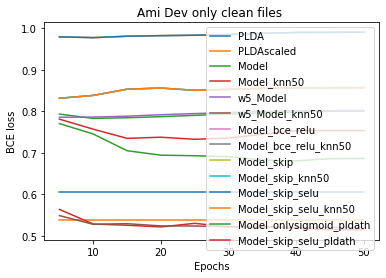

In [4]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp
from collections import defaultdict
dataset='ami_dev_fbank_0.75s'
pldalosspath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_pldaloss'
pldascaledlosspath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_pldascaledloss'

modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_loss'
# plt.plot(xaxis,rmodel['epoch_loss'][::5])
modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_knn50_loss'

w5modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_5_b2_-1/{dataset}_loss'
w5modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_5_b2_-1/{dataset}_knn50_loss'

# using only bceloss GCN relu
onlysig_modeloutputpath = f'exp_march/results_spec_sup_ae_norm_cosineloss_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/batchsize_64/{dataset}_loss'
onlysig_modeloutputpath_knn50 = f'exp_march/results_spec_sup_ae_norm_cosineloss_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/batchsize_64/{dataset}_knn50_loss/'
onlysig_modeloutputpath_pldath0_5 = f'exp_march/results_spec_sup_ae_norm_cosineloss_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/batchsize_64/{dataset}_pldath0.5_loss/'

# using skip
skip_modeloutputpath = f'exp_march/results_spec_sup_ae_norm_cosineloss_skip_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/batchsize_64/{dataset}_loss'
skip_modeloutputpath_knn50 = f'exp_march/results_spec_sup_ae_norm_cosineloss_skip_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/batchsize_64/{dataset}_knn50_loss/'

# using skip_selu
skipselu_modeloutputpath = f'exp_march/results_spec_sup_ae_norm_cosineloss_skip_selu_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/{dataset}_loss'
skipselu_modeloutputpath_knn50 = f'exp_march/results_spec_sup_ae_norm_cosineloss_skip_selu_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/{dataset}_knn50_loss/'
skipselu_modeloutputpath_pldath0_5 = f'exp_march/results_spec_sup_ae_norm_cosineloss_skip_selu_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/{dataset}_pldath0.5_loss/'

# type1='knninit50'
# modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_{type1}/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_loss'
#  plt.plot(xaxis,rmodel['epoch_loss'])
# modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_{type1}/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_knn50_loss'

# w5modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_{type1}/ami_sdm_train/{dataset}_loss'
# w5modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_{type1}/ami_sdm_train/{dataset}_knn50_loss'


with open(f'{pldalosspath}/results_full_loss.pkl','rb') as fb:
    rplda = pkl.load(fb)

with open(f'{pldascaledlosspath}/results_full_loss.pkl','rb') as fb:
    rpldascaled = pkl.load(fb)
    
with open(f'{modeloutputpath}/results_full_loss.pkl','rb') as fb:
    rmodel = pkl.load(fb)

with open(f'{modeloutputpath_knn50}/results_full_loss.pkl','rb') as fb:
    rmodel_knn = pkl.load(fb)

with open(f'{w5modeloutputpath}/results_full_loss.pkl','rb') as fb:
    w5rmodel = pkl.load(fb)

with open(f'{w5modeloutputpath_knn50}/results_full_loss.pkl','rb') as fb:
    w5rmodel_knn = pkl.load(fb)

with open(f'{skip_modeloutputpath}/results_full_loss.pkl','rb') as fb:
    ronlysigmodel = pkl.load(fb)

with open(f'{skip_modeloutputpath_knn50}/results_full_loss.pkl','rb') as fb:
    ronlysigsmodel_knn = pkl.load(fb)

with open(f'{skip_modeloutputpath}/results_full_loss.pkl','rb') as fb:
    rskipmodel = pkl.load(fb)

with open(f'{skip_modeloutputpath_knn50}/results_full_loss.pkl','rb') as fb:
    rskipmodel_knn = pkl.load(fb)

with open(f'{skip_modeloutputpath}/results_full_loss.pkl','rb') as fb:
    rskipselumodel = pkl.load(fb)

with open(f'{skip_modeloutputpath_knn50}/results_full_loss.pkl','rb') as fb:
    rskipselumodel_knn = pkl.load(fb)

with open(f'{onlysig_modeloutputpath_pldath0_5}/results_full_loss.pkl','rb') as fb:
    ronlysigsmodel_pldath0_5 = pkl.load(fb)

with open(f'{skipselu_modeloutputpath_pldath0_5}/results_full_loss.pkl','rb') as fb:
    rskipselumodel_pldath0_5 = pkl.load(fb)


nepochs = 50
xaxis = np.arange(5,nepochs+1,5)

plt.figure()
plt.plot(xaxis,rplda['epoch_loss'][::5])
plt.plot(xaxis,rpldascaled['epoch_loss'])
plt.plot(xaxis,rmodel['epoch_loss'][::5])
# plt.plot(xaxis,rmodel['epoch_loss'])
plt.plot(xaxis,rmodel_knn['epoch_loss'])
plt.plot(xaxis,w5rmodel['epoch_loss'])
plt.plot(xaxis,w5rmodel_knn['epoch_loss'])

plt.plot(xaxis,ronlysigmodel['epoch_loss'])
plt.plot(xaxis,ronlysigsmodel_knn['epoch_loss'])
plt.plot(xaxis,rskipmodel['epoch_loss'])
plt.plot(xaxis,rskipmodel_knn['epoch_loss'])

plt.plot(xaxis,rskipselumodel['epoch_loss'])
plt.plot(xaxis,rskipselumodel_knn['epoch_loss'])

plt.plot(xaxis,ronlysigsmodel_pldath0_5['epoch_loss'])
plt.plot(xaxis,rskipselumodel_pldath0_5['epoch_loss'])




plt.xlabel('Epochs')
plt.ylabel('BCE loss')
plt.title('Ami Dev only clean files ')
plt.legend(['PLDA','PLDAscaled','Model','Model_knn50','w5_Model','w5_Model_knn50','Model_bce_relu','Model_bce_relu_knn50','Model_skip','Model_skip_knn50','Model_skip_selu','Model_skip_selu_knn50','Model_bce_pldath','Model_skip_selu_pldath'], loc='upper right')


Accumulate losses for Train set

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp
from collections import defaultdict

# dataset='ami_dev_fbank_0.75s'
dataset = 'ami_sdm_train'

pldalosspath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_pldaloss'
modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_loss'
# modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_knn50_loss'


# modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_5_b2_-1/{dataset}_loss'
# modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_5_b2_-1/{dataset}_knn50_loss'

#using KNN Plda = 50
#w2=1,b2=0
modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_knninit50/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_loss'

modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_knninit50/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_knn50_loss'

# w2=5,b2=-1
# modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_knninit50/ami_sdm_train/{dataset}_loss'
# modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_knninit50/ami_sdm_train/{dataset}_knn50_loss'

nj=80
nepochs = 50

results = defaultdict(list)
# results['epoch_loss'] = []
for epoch in range(5,nepochs+1,5):
    total_loss = 0
    total_length = 0
    for job in range(1,nj+1):
        with open(f'{modeloutputpath_knn50}/results_epoch_{epoch}_{job}.pkl','rb') as fb:
            r1 = pkl.load(fb)
            total_loss += np.sum(r1['val_loss'])
            total_length += np.sum(r1['total_val_len'])
    avg_loss = total_loss/total_length
    results['epoch_loss'].append(avg_loss)
with open(f'{modeloutputpath_knn50}/results_full_loss.pkl','wb') as writef:
    pkl.dump(results,writef)



Plots BCE loss for Train set Trained model using Prototypical loss with PLDA FULL adj with Gnd adj. Case1: w2=1,b2=0. Case2: w2=5, b2=-1

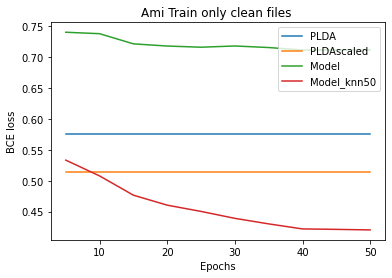

In [7]:

# Train set plot
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp
from collections import defaultdict
dataset='ami_sdm_train'
pldalosspath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_pldaloss'
pldascaledlosspath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_pldascaledloss'

# modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_loss'
# modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_knn50_loss'

# w5modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_5_b2_-1/{dataset}_loss'
# w5modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_5_b2_-1/{dataset}_knn50_loss'

#using KNN Plda = 50
#w2=1,b2=0
modeloutputpath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_knninit50/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_loss'

modeloutputpath_knn50 = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_knninit50/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_knn50_loss'


with open(f'{pldalosspath}/results_full_loss.pkl','rb') as fb:
    rplda = pkl.load(fb)
    
with open(f'{pldascaledlosspath}/results_full_loss.pkl','rb') as fb:
    rpldascaled = pkl.load(fb)

with open(f'{modeloutputpath}/results_full_loss.pkl','rb') as fb:
    rmodel = pkl.load(fb)

with open(f'{modeloutputpath_knn50}/results_full_loss.pkl','rb') as fb:
    rmodel_knn = pkl.load(fb)

# with open(f'{w5modeloutputpath}/results_full_loss.pkl','rb') as fb:
#     w5rmodel = pkl.load(fb)

# with open(f'{w5modeloutputpath_knn50}/results_full_loss.pkl','rb') as fb:
#     w5rmodel_knn = pkl.load(fb)

nepochs = 50
xaxis = np.arange(5,nepochs+1,5)

plt.figure()
plt.plot(xaxis,rplda['epoch_loss'])
plt.plot(xaxis,rpldascaled['epoch_loss'])
plt.plot(xaxis,rmodel['epoch_loss'])
plt.plot(xaxis,rmodel_knn['epoch_loss'])
# plt.plot(xaxis,w5rmodel['epoch_loss'])
# plt.plot(xaxis,w5rmodel_knn['epoch_loss'])
plt.xlabel('Epochs')
plt.ylabel('BCE loss')
plt.title('Ami Train only clean files ')
plt.legend(['PLDA','PLDAscaled','Model','Model_knn50'], loc='upper right')

# plt.legend(['PLDA','Model','Model_knn50','w5_Model','w5_Model_knn50'], loc='upper right')


In [5]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
from pdb import set_trace as bp
from collections import defaultdict

# dataset = 'ami_sdm_train'
dataset='ami_dev_fbank_0.75s'
pldalosspath = f'/data1/prachis/Dihard_2020/gae-pytorch/gae/exp_march/results_spec_sup_ae_norm_cosinesoftmaxloss_angleproto_clean_0_xvec0.75shift_norm_AmiPLDA_scaled/_avg_accumgradient_use_gnd_adj_withadjplda_full/ami_sdm_train/with_w2_1_b2_0.0/{dataset}_pldaloss_correct'

nj=15
nepochs = 50

results = defaultdict(list)
# results['epoch_loss'] = []
for epoch in range(5,nepochs+1,5):
    total_loss = 0
    total_length = 0
    for job in range(1,nj+1):
        with open(f'{pldalosspath}/results_epoch_50_{job}.pkl','rb') as fb:
            r1 = pkl.load(fb)
            total_loss += np.sum(r1['val_loss'])
            total_length += np.sum(r1['total_val_len'])
    avg_loss = total_loss/total_length
    results['epoch_loss'].append(avg_loss)
with open(f'{pldalosspath}/results_full_loss.pkl','wb') as writef:
    pkl.dump(results,writef)

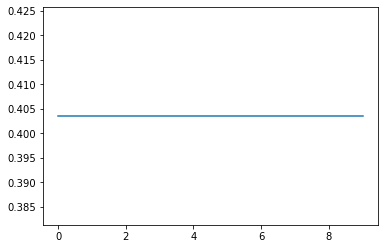

In [6]:
plt.plot(results['epoch_loss'])

#### Plot train vs val loss for 2nd pass SHARC model

In [ ]:
import matplotlib as mp
import matplot